In [3]:
#importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#reading the dataset
df=pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


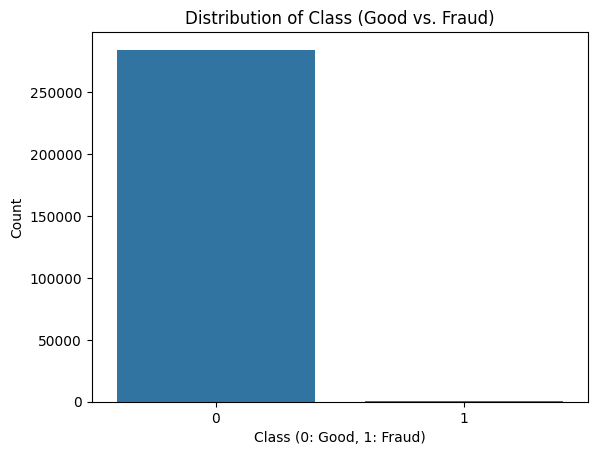

In [36]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class (Good vs. Fraud)')
plt.xlabel('Class (0: Good, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [8]:
good=df[df.Class==0]
fraud=df[df.Class==1]
print(good.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
good.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [10]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [11]:
good1=good.sample(n=492)


In [15]:
dff=pd.concat([good1,fraud],axis=0)
dff

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
137498,82188.0,-1.244011,1.167384,1.106291,0.084011,-0.197169,1.336901,-0.880094,1.257112,-0.680574,...,0.215406,0.208449,0.122870,4.022866,0.226951,0.308259,-0.370707,-0.148915,15.05,0
163794,116213.0,-0.511753,1.166283,-1.853068,-0.112711,2.998450,3.617452,0.547437,1.220335,-0.989865,...,0.166287,0.499667,-0.126669,0.713003,0.114271,-0.355749,0.319259,0.177296,42.50,0
259605,159195.0,1.687116,-0.634330,0.003090,1.236405,-0.653160,0.560156,-0.820164,0.305123,0.917375,...,0.203085,0.463794,0.209202,0.669071,-0.401063,-0.788246,0.056906,-0.005062,106.86,0
154482,101706.0,-1.218044,2.336109,-1.447815,-0.339775,0.471647,0.518024,-1.709694,-4.936399,0.483806,...,-2.974173,-0.219608,0.565085,0.079878,-0.502376,0.068843,0.016163,0.079413,18.99,0
81838,59117.0,-0.697559,1.521631,1.216827,1.997897,0.812757,-0.101684,0.997276,-0.075281,-1.839629,...,0.128080,0.181200,-0.330243,0.006942,0.234113,0.126312,-0.223902,0.093285,0.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


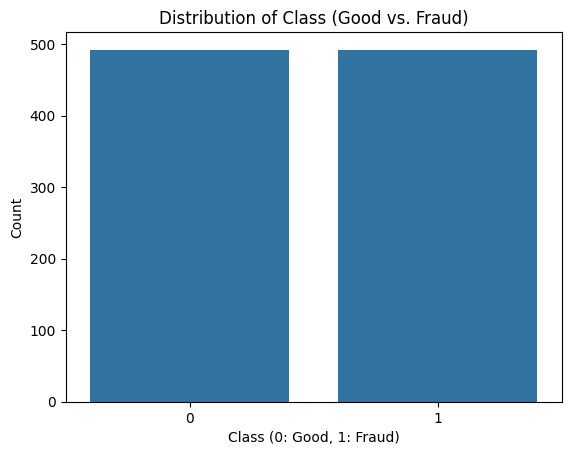

In [35]:
sns.countplot(x='Class', data=dff)
plt.title('Distribution of Class (Good vs. Fraud)')
plt.xlabel('Class (0: Good, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [18]:
x=dff.drop(columns='Class')
y=dff['Class']

In [21]:
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
137498   82188.0 -1.244011  1.167384  1.106291  0.084011 -0.197169  1.336901   
163794  116213.0 -0.511753  1.166283 -1.853068 -0.112711  2.998450  3.617452   
259605  159195.0  1.687116 -0.634330  0.003090  1.236405 -0.653160  0.560156   
154482  101706.0 -1.218044  2.336109 -1.447815 -0.339775  0.471647  0.518024   
81838    59117.0 -0.697559  1.521631  1.216827  1.997897  0.812757 -0.101684   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [26]:
model=LogisticRegression()

In [27]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  94.79034307496823


In [33]:
x_test_prediction=model.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Testing data : ', training_data_accuracy*100)

Accuracy on Training data :  93.4010152284264
